<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/NN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Neural Networks from scratch with Pytorch and Google Colab, Afrahysin

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


Data

In [2]:
X = torch.tensor(([
    [30,8], # Temperature and sunny days for City A
    [25, 5], # Temperature and sunny days for City B
    [28,6], # Temperature and sunny days for City C
    [32,10], # Temperature and sunny days for City D
]), dtype = torch.float)

y = torch.tensor(([200], [150], [180], [200]), dtype=torch.float) # Ice cream sales for each city

xPredicted = torch.tensor(([27,7]), dtype=torch.float)

In [3]:
print(X.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([4, 1])


Scaling
(torch.max returns both values and indices)

In [4]:
X_max,_ = torch.max(X, 0)
xPredicted_max,_ = torch.max(xPredicted,0)

X = torch.div(X, X_max)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100
print(y)
print(X)

tensor([[2.0000],
        [1.5000],
        [1.8000],
        [2.0000]])
tensor([[0.9375, 0.8000],
        [0.7812, 0.5000],
        [0.8750, 0.6000],
        [1.0000, 1.0000]])


Visualize

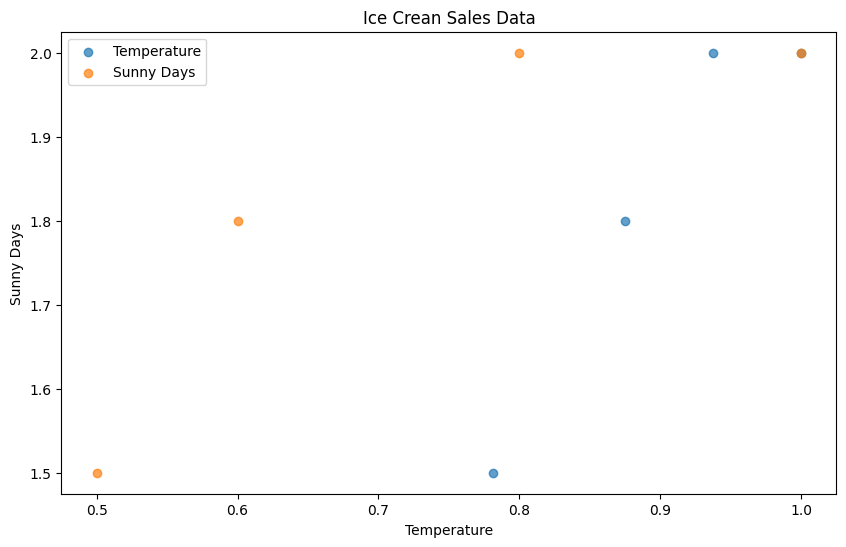

In [5]:
plt.figure(figsize=(10,6))

plt.scatter(X[:,0], y, label='Temperature', alpha=0.7)
plt.scatter(X[:,1], y, label='Sunny Days', alpha=0.7)

plt.title('Ice Crean Sales Data')
plt.xlabel('Temperature')
plt.ylabel('Sunny Days')
plt.legend()
plt.show()

In [6]:
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.optim as optim

class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 4

        # weights
        self.W1 = nn.Parameter(torch.randn(self.inputSize, self.hiddenSize))
        self.W2 = nn.Parameter(torch.randn(self.hiddenSize, self.outputSize))

    def forward(self, X):
        self.z = torch.matmul(X, self.W1)  # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = torch.relu(self.z)  # ReLU activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.z3
        return o

    def backward(self, X, y, o, optimizer):
        # calculate loss
        loss = torch.mean((y - o)**2)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        return loss

    def train(self, X, y, epochs=100, learning_rate=0.01):
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            # forward pass
            o = self.forward(X)

            # backward pass
            loss = self.backward(X, y, o, optimizer)

            # Optionally, you can print the loss for each epoch if needed
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

    def predict(self, X):
        print("Predicted data based on trained weights: ")
        print("Input (scaled): \n" + str(X))
        print("Output: \n" + str(self.forward(X)))

In [7]:
# Assuming you have X and u defined
model = Neural_Network()
model.train(X, y, epochs=100, learning_rate=0.01)

Epoch 1/100, Loss: 1.6535109281539917
Epoch 2/100, Loss: 1.5027896165847778
Epoch 3/100, Loss: 1.3612723350524902
Epoch 4/100, Loss: 1.2287808656692505
Epoch 5/100, Loss: 1.1051688194274902
Epoch 6/100, Loss: 0.9902958273887634
Epoch 7/100, Loss: 0.8840062022209167
Epoch 8/100, Loss: 0.7861150503158569
Epoch 9/100, Loss: 0.6963984966278076
Epoch 10/100, Loss: 0.6145880818367004
Epoch 11/100, Loss: 0.5403711795806885
Epoch 12/100, Loss: 0.47339239716529846
Epoch 13/100, Loss: 0.4132595658302307
Epoch 14/100, Loss: 0.3595507740974426
Epoch 15/100, Loss: 0.3118226230144501
Epoch 16/100, Loss: 0.2696189284324646
Epoch 17/100, Loss: 0.23247961699962616
Epoch 18/100, Loss: 0.19994863867759705
Epoch 19/100, Loss: 0.17158125340938568
Epoch 20/100, Loss: 0.1469501405954361
Epoch 21/100, Loss: 0.12564997375011444
Epoch 22/100, Loss: 0.10730135440826416
Epoch 23/100, Loss: 0.091552734375
Epoch 24/100, Loss: 0.07808206230401993
Epoch 25/100, Loss: 0.0665968805551529
Epoch 26/100, Loss: 0.056834079

In [8]:
xtest = torch.tensor(([27, 7]), dtype=torch.float)
model.predict(xtest)

Predicted data based on trained weights: 
Input (scaled): 
tensor([27.,  7.])
Output: 
tensor([49.0652], grad_fn=<SqueezeBackward4>)
